In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def softmax(x) :
    ex = np.exp(x - np.max(x))
    return ex / ex.sum()

In [118]:
data = [1 , 2 , 4 , 5]
arg = softmax(data)
print(data , arg)
result = np.argmax(arg)
print(result)

[1, 2, 4, 5] [0.01275478 0.03467109 0.25618664 0.69638749]
3


In [119]:
def load_image(file_name) :
    with open(file_name , "rb") as f :
        magic_number = int.from_bytes(f.read(4) , "big")
        image_count  = int.from_bytes(f.read(4) , "big")
        image_row    = int.from_bytes(f.read(4) , "big")
        image_col = int.from_bytes(f.read(4) , "big")
        image_data = f.read()
        image = np.frombuffer(image_data , dtype = np.uint8).reshape(image_count , image_row , image_col)
    return image

def load_label(file_name) :
    with open(file_name , "rb") as f :
        magic_number = int.from_bytes(f.read(4) , "big")
        image_count  = int.from_bytes(f.read(4) , "big")
        image_data = f.read()
        image = np.frombuffer(image_data , dtype = np.uint8)
    return image

In [120]:
train_mist_img = load_image("./mnist/train-images.idx3-ubyte")
test_mist_img = load_image("./mnist/t10k-images.idx3-ubyte")
train_mist_label = load_label("./mnist/train-labels.idx1-ubyte")
test_mist_label = load_label("./mnist/t10k-labels.idx1-ubyte")

In [121]:
print(train_mist_img.shape , test_mist_img.shape)
print(train_mist_label.shape , test_mist_label.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [122]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(train_mist_label , 10)
y_test = tf.keras.utils.to_categorical(test_mist_label , 10)

In [123]:
idx = np.random.randint(1 , 10000 - 1 , 1)
print(test_mist_label[idx] , y_test[idx] , np.argmax(y_test[idx]))

[7] [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]] 7


[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949] [0.  0.9 1.8 2.7 3.6 4.5 5.4 6.3 7.2 8.1 9. ]


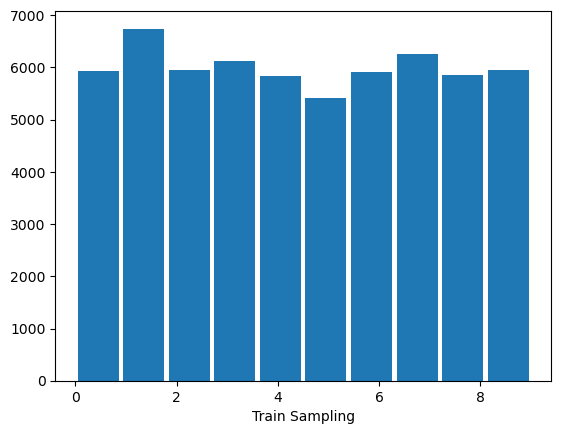

[ 980 1135 1032 1010  982  892  958 1028  974 1009] [0.  0.9 1.8 2.7 3.6 4.5 5.4 6.3 7.2 8.1 9. ]


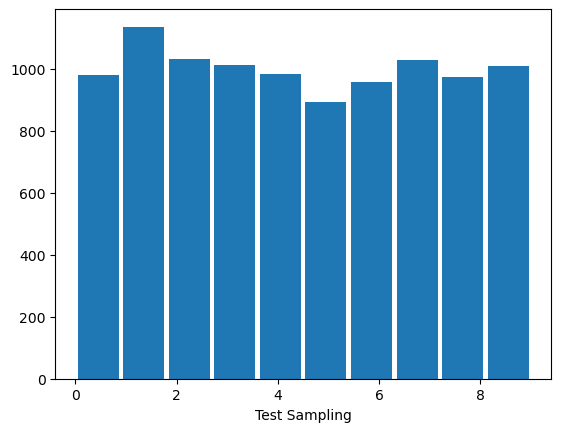

In [124]:
count , bins = np.histogram(train_mist_label)
print(count , bins)
plt.hist(bins[:-1] , bins , weights = count , rwidth = 0.9)
plt.xlabel("Train Sampling")
plt.show()
count , bins = np.histogram(test_mist_label)
print(count , bins)
plt.hist(bins[:-1] , bins , weights = count , rwidth = 0.9)
plt.xlabel("Test Sampling")
plt.show()

In [125]:
train_data = train_mist_img.reshape(train_mist_img.shape[0] , -1)
test_data = train_mist_img.reshape(test_mist_img.shape[0] , -1)

In [126]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1025 , input_shape = (784 , ) , activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units = 255 , activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units = 40 , activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units = 10 , activation = tf.keras.activations.softmax))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1025)              804625    
                                                                 
 dense_33 (Dense)            (None, 255)               261630    
                                                                 
 dense_34 (Dense)            (None, 40)                10240     
                                                                 
 dense_35 (Dense)            (None, 10)                410       
                                                                 
Total params: 1076905 (4.11 MB)
Trainable params: 1076905 (4.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3) ,
              loss = tf.keras.losses.categorical_crossentropy ,
              metrics = [tf.keras.metrics.categorical_accuracy])

In [128]:
history = model.fit(train_data , y_train , batch_size = 1000 , shuffle = True , epochs = 10)  #epochs= 200

Epoch 1/10
60/60 [==============================] - 4s 64ms/step - loss: 7.5262 - categorical_accuracy: 0.6279
Epoch 2/10
60/60 [==============================] - 4s 59ms/step - loss: 0.6242 - categorical_accuracy: 0.8368
Epoch 3/10
60/60 [==============================] - 5s 83ms/step - loss: 0.4296 - categorical_accuracy: 0.8845
Epoch 4/10
60/60 [==============================] - 5s 81ms/step - loss: 0.3182 - categorical_accuracy: 0.9105
Epoch 5/10
60/60 [==============================] - 6s 96ms/step - loss: 0.2489 - categorical_accuracy: 0.9279
Epoch 6/10
60/60 [==============================] - 4s 66ms/step - loss: 0.2079 - categorical_accuracy: 0.9398
Epoch 7/10
60/60 [==============================] - 4s 64ms/step - loss: 0.1724 - categorical_accuracy: 0.9479
Epoch 8/10
60/60 [==============================] - 4s 62ms/step - loss: 0.1519 - categorical_accuracy: 0.9541
Epoch 9/10
60/60 [==============================] - 4s 61ms/step - loss: 0.1231 - categorical_accuracy: 0.9616
E

In [129]:
_ , acc = model.evaluate(train_data , y_train)
print(acc)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0806 - categorical_accuracy: 0.9730
0.9730499982833862


1/1 [==============================] - 0s 94ms/step


(-0.5, 27.5, 27.5, -0.5)

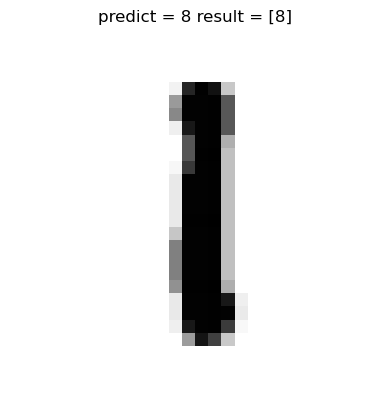

In [130]:
idx = np.random.randint(1 , 10000 , 1)
data = train_data[idx]
result = model.predict(data)
show_label = np.argmax(result)

plt.title(f"predict = {show_label} result = {train_mist_label[idx]}")
plt.imshow(test_mist_img[idx][0] , plt.cm.binary)
plt.axis("off")

In [131]:
wrong = 0
for i in range(1000) :
    idx = np.random.randint(1 , 10000 , 1)
    data = train_data[idx]
    result = model.predict(data , verbose = 0)
    p_class = np.argmax(result)
    ans = train_mist_label[idx]
    if(p_class != ans) :
        print(wrong , p_class , "True Ans" , ans)
        wrong = wrong + 1
print("Total Wrong" , wrong)

0 4 True Ans [5]
1 3 True Ans [2]
2 5 True Ans [8]
3 8 True Ans [2]
4 8 True Ans [3]
5 8 True Ans [3]
6 8 True Ans [3]
7 5 True Ans [3]
8 4 True Ans [9]
9 9 True Ans [7]
10 8 True Ans [2]
11 8 True Ans [2]
12 9 True Ans [7]
13 4 True Ans [3]
14 2 True Ans [3]
15 9 True Ans [3]
16 2 True Ans [8]
17 9 True Ans [7]
18 6 True Ans [4]
19 5 True Ans [8]
20 9 True Ans [7]
21 9 True Ans [7]
22 8 True Ans [3]
23 8 True Ans [1]
24 7 True Ans [0]
25 8 True Ans [2]
26 4 True Ans [3]
27 6 True Ans [9]
28 7 True Ans [3]
29 8 True Ans [2]
Total Wrong 30


In [132]:
wrong = 0
for i in range(1000) :
    idx = np.random.randint(1 , 10000 , 1)
    data = test_data[idx]
    p_class = np.argmax(result)
    ans = test_mist_label[idx]
    if(p_class != ans) :
        wrong = wrong + 1
        print(wrong , p_class , "True Ans" , ans)
print("Total Wrong" , wrong)

1 9 True Ans [2]
2 9 True Ans [6]
3 9 True Ans [6]
4 9 True Ans [3]
5 9 True Ans [3]
6 9 True Ans [0]
7 9 True Ans [8]
8 9 True Ans [4]
9 9 True Ans [7]
10 9 True Ans [0]
11 9 True Ans [0]
12 9 True Ans [5]
13 9 True Ans [5]
14 9 True Ans [7]
15 9 True Ans [0]
16 9 True Ans [2]
17 9 True Ans [7]
18 9 True Ans [3]
19 9 True Ans [1]
20 9 True Ans [4]
21 9 True Ans [6]
22 9 True Ans [2]
23 9 True Ans [1]
24 9 True Ans [3]
25 9 True Ans [7]
26 9 True Ans [7]
27 9 True Ans [3]
28 9 True Ans [7]
29 9 True Ans [7]
30 9 True Ans [4]
31 9 True Ans [6]
32 9 True Ans [2]
33 9 True Ans [0]
34 9 True Ans [7]
35 9 True Ans [2]
36 9 True Ans [3]
37 9 True Ans [6]
38 9 True Ans [7]
39 9 True Ans [6]
40 9 True Ans [6]
41 9 True Ans [7]
42 9 True Ans [6]
43 9 True Ans [6]
44 9 True Ans [7]
45 9 True Ans [3]
46 9 True Ans [7]
47 9 True Ans [3]
48 9 True Ans [1]
49 9 True Ans [0]
50 9 True Ans [8]
51 9 True Ans [1]
52 9 True Ans [8]
53 9 True Ans [2]
54 9 True Ans [7]
55 9 True Ans [7]
56 9 True Ans [2]
5

In [133]:
#Homework

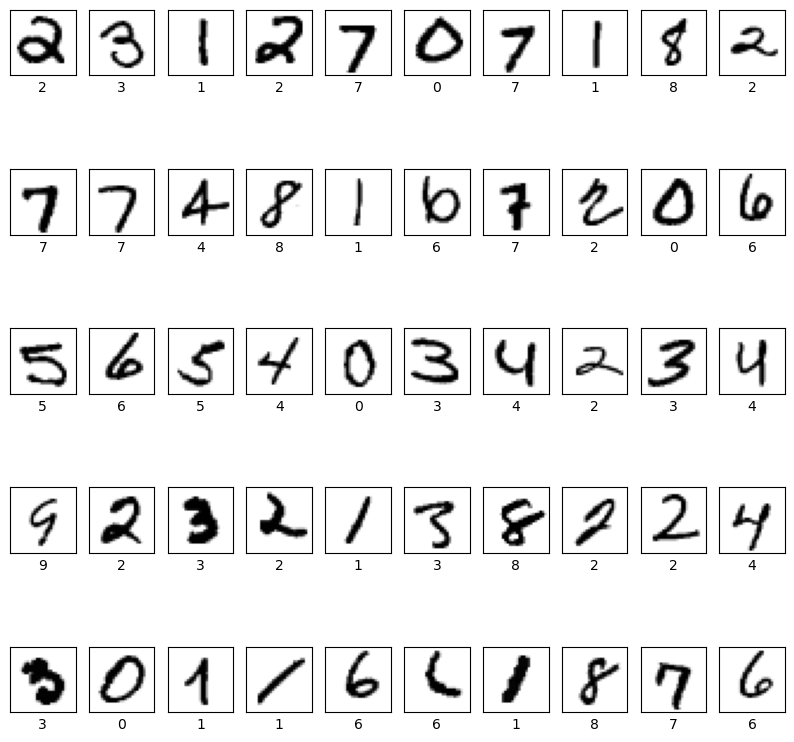

In [134]:
# Blockที่ 1 แสดง ภาพตัวอย่าง เลขแบบสุ่ม เลขละ 5 ภาพ รวม 50 ภาพ กดแต่ละครั้งต้องไม่ซ้ำ

# สุ่มเลือก 50 ตัวอย่างที่ไม่ซ้ำกัน
random_indices = np.random.choice(len(train_mist_img), size=50, replace=False)

# สร้างกราฟขนาด 10x10 นิ้ว
plt.figure(figsize=(10, 10))

for i, idx in enumerate(random_indices):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im = train_mist_img[idx]
    plt.imshow(im, cmap=plt.cm.binary)
    plt.xlabel(train_mist_label[idx])

plt.show()

In [136]:
# Blockที่ 2 แสดง ค่าความแม่นยำของ model
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(train_mist_label, 10) #แปลงจาก label เป็น encoding
y_test = tf.keras.utils.to_categorical(test_mist_label, 10)

idx = np.random.randint(1,10000-1,1)
print(test_mist_label[idx], y_test[idx], np.argmax(y_test[idx]))

train_data = train_mist_img.reshape(train_mist_img.shape[0], -1)
test_data = test_mist_img.reshape(test_mist_img.shape[0], -1)

model = tf.keras.models.Sequential()
# model.add(tf.keras.Input(shape=train_data.shape))
model.add(tf.keras.layers.Dense(units=1025,input_shape=(784,), activation=tf.keras.activations.sigmoid)) 
model.add(tf.keras.layers.Dense(units=255,activation=tf.keras.activations.softmax)) 
model.add(tf.keras.layers.Dense(units=40,activation=tf.keras.activations.softmax)) 
model.add(tf.keras.layers.Dense(units=10,activation=tf.keras.activations.softmax)) 

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics=[tf.keras.metrics.categorical_accuracy])

history = model.fit(train_data,
                    y_train,
                    batch_size=1000,
                    shuffle=True,
                    epochs=100)

_, train_acc = model.evaluate(train_data, y_train)
print(train_acc)

[7] [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]] 7
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 1025)              804625    
                                                                 
 dense_41 (Dense)            (None, 255)               261630    
                                                                 
 dense_42 (Dense)            (None, 40)                10240     
                                                                 
 dense_43 (Dense)            (None, 10)                410       
                                                                 
Total params: 1076905 (4.11 MB)
Trainable params: 1076905 (4.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
60/60 [==============================] - 4s 52ms/step - loss: 2.2961 - categorical_accuracy: 0.

In [137]:
# Blockที่ 3 แสดง ผลการพิสูจน์ เลข จากชุด test dataset ทุกเลข 10000 ค่า ผิดกี่ครั้ง และมีเลขใดผิดบ้าง ผลที่ถูกต้องคือเลขใด

predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
correct_labels = np.argmax(y_test, axis=1)

incorrect_indices = np.where(predicted_labels != correct_labels)[0]
incorrect_count = len(incorrect_indices)
incorrect_labels = predicted_labels[incorrect_indices]
correct_labels = correct_labels[incorrect_indices]

print(f'จำนวนผลที่ผิด: {incorrect_count}')
print(f'ผลลัพธ์ที่ถูกต้องคือ: {correct_labels}')
print(f'ผลลัพธ์ที่ผิดคือ: {incorrect_labels}')

313/313 [==============================] - 2s 5ms/step
จำนวนผลที่ผิด: 1431
ผลลัพธ์ที่ถูกต้องคือ: [5 5 5 ... 3 5 5]
ผลลัพธ์ที่ผิดคือ: [8 3 3 ... 2 3 3]


In [138]:
# Block ที่ 4 เมื่อสุ่ม 100 ค่า จากชุด train ผิดกี่ภาพ

# จำนวนตัวอย่างที่จะสุ่ม
num_samples_to_randomly_select = 100

# สุ่มเลือกตัวอย่าง 100 ตัวอย่างจากชุดการฝึก
random_indices = np.random.choice(len(train_mist_img), size=num_samples_to_randomly_select, replace=False)

# จำนวนภาพที่ทำนายผิด
wrong_predictions1 = 0

# ทำนายและตรวจสอบความถูกต้องสำหรับตัวอย่างที่ถูกสุ่มเลือก
for i in random_indices:
    data = train_data[i]
    predicted_class = np.argmax(result)
    true_class1 = train_mist_label[i]

    # ตรวจสอบว่าทำนายถูกหรือผิด
    if predicted_class != true_class1:
        wrong_predictions1 += 1

print(f"จำนวนภาพที่ทำนายผิดจากการสุ่ม 100 ตัวอย่าง: {wrong_predictions1}")

จำนวนภาพที่ทำนายผิดจากการสุ่ม 100 ตัวอย่าง: 83


In [139]:
# Block ที่ 5 เมื่อสุ่ม 100 ค่า จากชุด test ผิดกี่ภาพ

# จำนวนตัวอย่างที่จะสุ่ม
num_samples_to_randomly_select = 100

# สุ่มเลือกตัวอย่าง 100 ตัวอย่างจากชุดข้อมูลทดสอบ
random_indices = np.random.choice(len(test_mist_img), size=num_samples_to_randomly_select, replace=False)

# จำนวนภาพที่ทำนายผิด
wrong_predictions = 0

# ทำนายและตรวจสอบความถูกต้องสำหรับตัวอย่างที่ถูกสุ่มเลือก
for i in random_indices:
    data = test_data[i]
    predicted_class = np.argmax(result)

    # ตรวจสอบว่าทำนายถูกหรือผิด
    if predicted_class != test_mist_label[i]:
        wrong_predictions += 1

print(f"จำนวนภาพที่ทำนายผิดจากการสุ่ม 100 ตัวอย่างในชุดทดสอบ: {wrong_predictions}")

จำนวนภาพที่ทำนายผิดจากการสุ่ม 100 ตัวอย่างในชุดทดสอบ: 95
